# BBN

## Function of As 

In [21]:
df_As = pd.read_csv('/scratch/rag394/alterbbn/09_03_2018.dat', sep='\s+',names=['AsBe7','Yp','D','He3_H','Li7_H','Li6_H','Be7_H'])
df_As['Li7_total']=df_As['Be7_H'] + df_As['Li7_H']
df_As.set_index('AsBe7',inplace=True)
df_As=df_As.iloc[1:]

In [22]:
df_As.head()

,Yp,D,He3_H,Li7_H,Li6_H,Be7_H,Li7_total
AsBe7,,,,,,,
1.000000e+12,0.246293,0.000026,0.00001,2.069620e-11,1.120440e-14,2.579560e-10,2.786522e-10
2.000000e+12,0.246293,0.000026,0.00001,2.003330e-11,1.120440e-14,2.385360e-10,2.585693e-10
3.000000e+12,0.246293,0.000026,0.00001,1.966220e-11,1.120450e-14,2.276530e-10,2.473152e-10
4.000000e+12,0.246293,0.000026,0.00001,1.940670e-11,1.120450e-14,2.201590e-10,2.395657e-10
5.000000e+12,0.246293,0.000026,0.00001,1.921280e-11,1.120450e-14,2.144800e-10,2.336928e-10


<IPython.core.display.Javascript object>


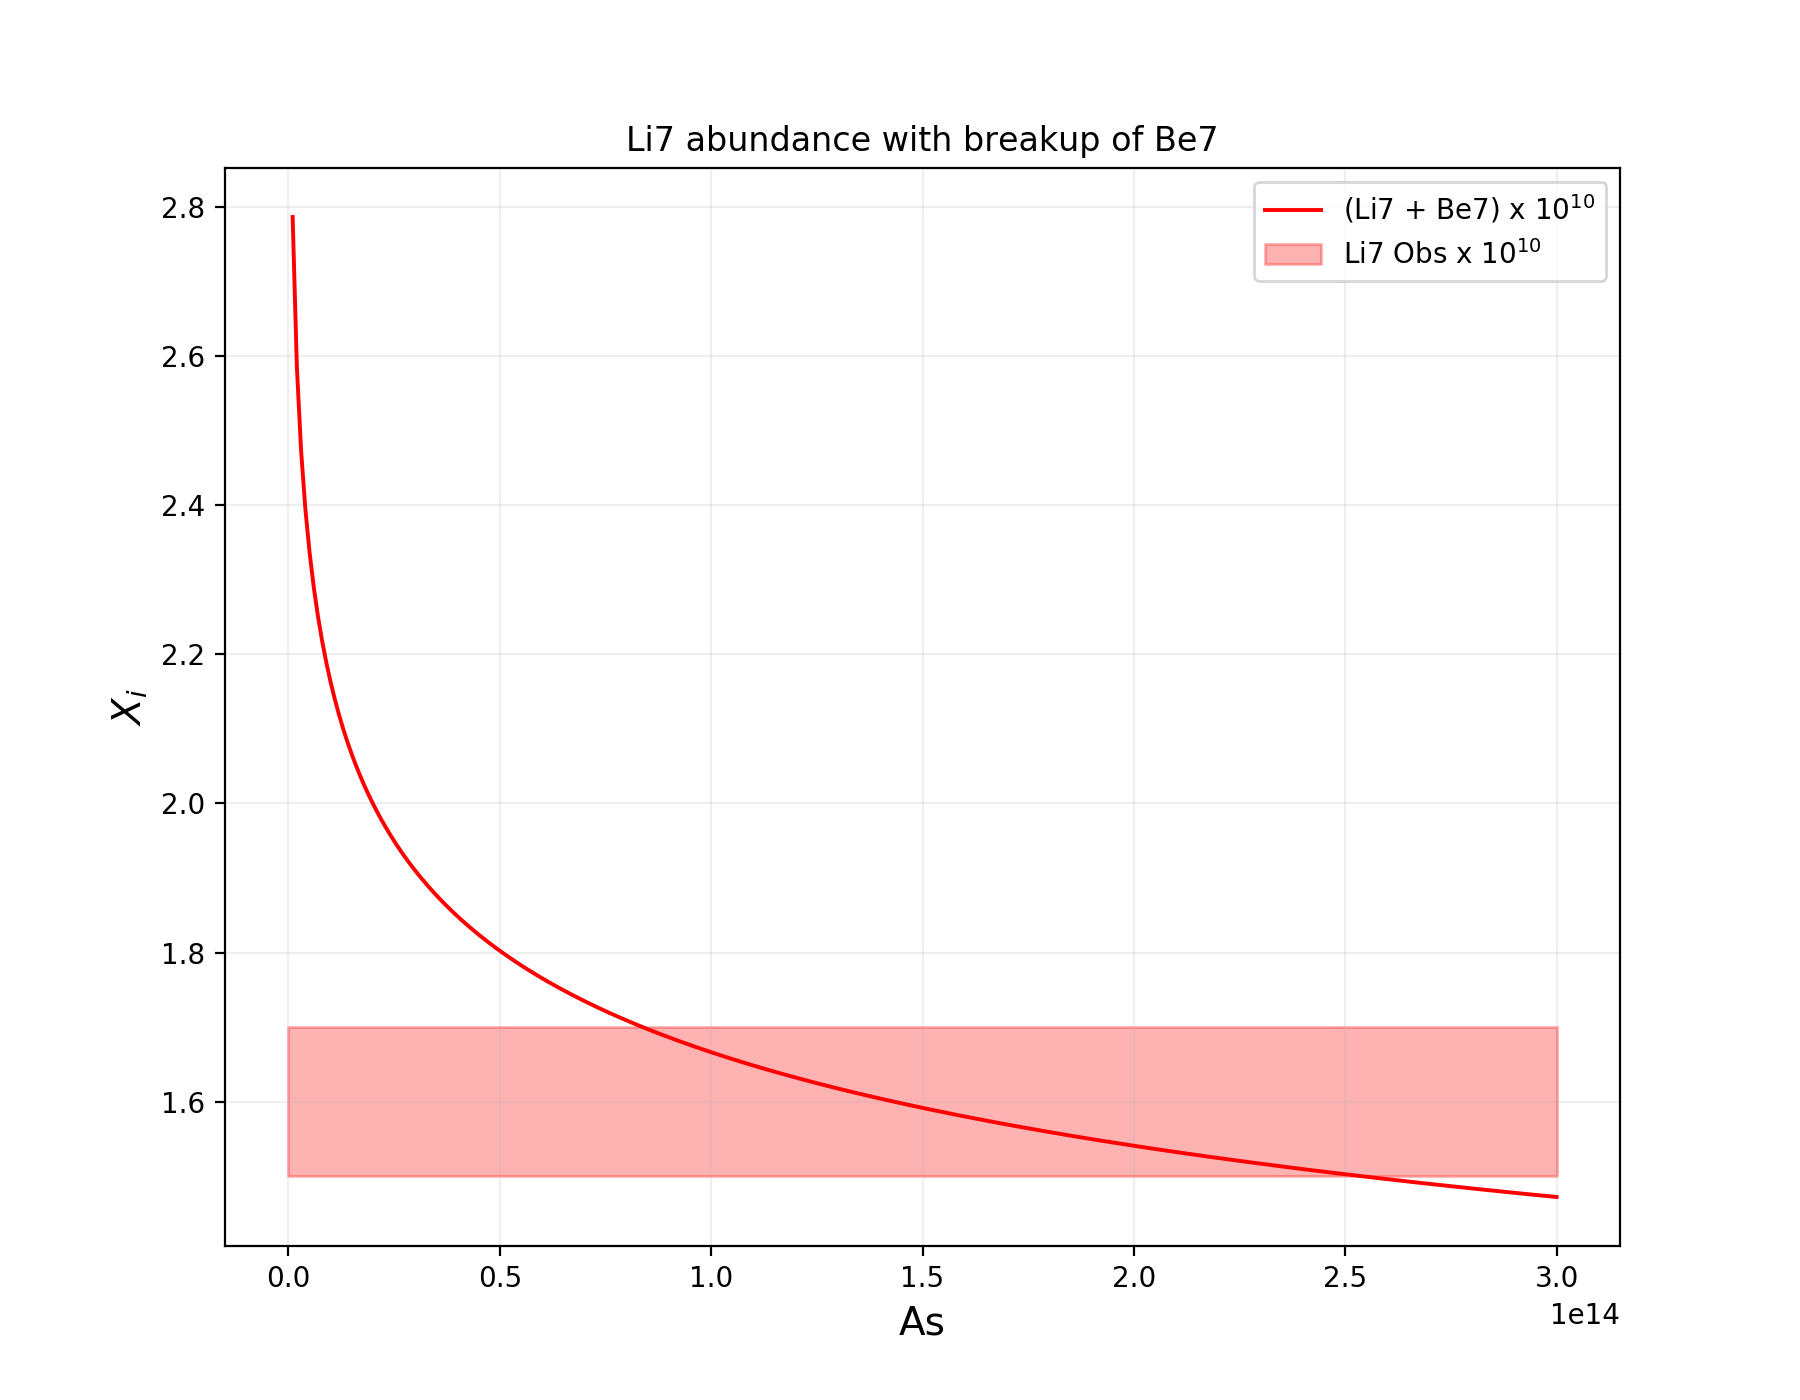

Text(0.5,1,'Li7 abundance with breakup of Be7')

In [23]:
fig, ax = plt.subplots(figsize=(9,7))
(1.0e10*df_As['Li7_H'] + 1.0e10*df_As['Be7_H']).plot(ax=ax, label='(Li7 + Be7) x $10^{10}$', lw=1.4, color='red')
#(df_As['D']*1.0e5).plot(ax=ax, label='H2 x $10^{5}$', lw=1.4, color='b',alpha=0.7)
xspace=[0, df_As.index[-1]]
ax.fill_between(xspace, 1.5, 1.7,  color='r', alpha=0.3, label='Li7 Obs x $10^{10}$')
#ax.fill_between(xspace, 2.51, 2.6, color='b', alpha=0.3,  label='Obs')
ax.legend(loc='best', fontsize=10);
ax.set_ylabel(r'$X_i$', fontsize=14)
ax.set_xlabel(r'As', fontsize=14)
ax.set_title('Li7 abundance with breakup of Be7')
#ax.set_xlim(0.04,0.08);

# Function of me/T

In [40]:
df_spec = pd.read_csv('/scratch/rag394/alterbbn/output_As_0.125.dat', names=names, sep='\s+', header=None)
df_spec.set_index('T9', inplace=True)
df_spec.index = df_spec.index.astype(float)
df_spec.index = 1./df_spec.index * 5.9281 #* 10**-9
df_spec.sort_index(inplace=True)
df_s = pd.read_csv('/scratch/rag394/alterbbn/output_As_0.0.dat', names=names, sep='\s+', header=None)
df_s.set_index('T9', inplace=True)
df_s.index = df_s.index.astype(float)
df_s.index = 1./df_s.index * 5.9281 #* 10**-9
df_s.sort_index(inplace=True)

In [36]:
df = df_spec

<IPython.core.display.Javascript object>


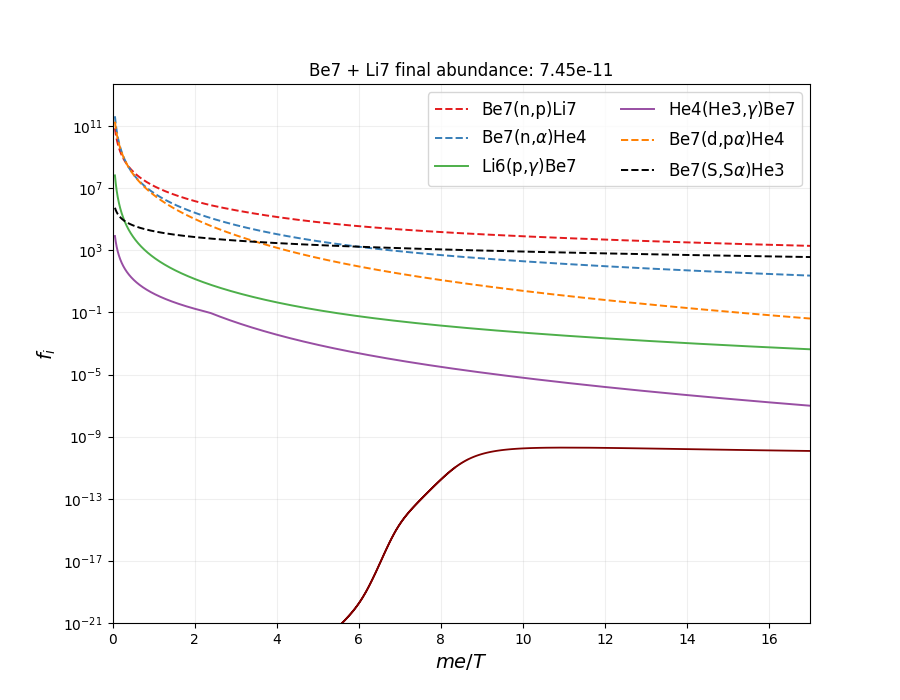

In [41]:
#cm = plt.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(9,7))
#ax.set_color_cycle([cm(1.*i/15) for i in range(15)])
df['f17'].plot(ax=ax, logy=True, label=r'Be7(n,p)Li7', lw=1.4, linestyle='--', color=colors[0]);
df['f19'].plot(ax=ax, logy=True, label=r'Be7(n,$\alpha$)He4', lw=1.4, linestyle='--', color=colors[1]);
df['f21'].plot(ax=ax, logy=True, label=r'Li6(p,$\gamma$)Be7', lw=1.4, color=colors[2]);
df['f27'].plot(ax=ax, logy=True, label=r'He4(He3,$\gamma$)Be7', lw=1.4, color=colors[3]);
df['f34'].plot(ax=ax, logy=True, label=r'Be7(d,p$\alpha$)He4', linestyle='--', lw=1.4, color=colors[4]);
df['f89'].plot(ax=ax, logy=True, label=r'Be7(S,S$\alpha$)He3',lw=1.4, linestyle='--', color=colors[5]);
df['Be7'].plot(ax=ax, label='_nolegend_', logy=True, lw=1.3, legend=False,
                 alpha=1.0, color='maroon')   
ax.set_ylim(1.0e-21, );
ax.set_xlim(0,17);
ax.legend(loc='best',  ncol=2, fontsize=12);
ax.set_ylabel(r'$f_i$', fontsize=14);
ax.set_xlabel(r'$me/T$',   fontsize=14);
ax.set_title('Be7 + Li7 final abundance: {:.3}'.format((df.iloc[-1]['Be7']+df.iloc[-1]['Li7'])));

In [44]:
df_s.iloc[-1]

Yp     2.462931e-01
H2     2.580847e-05
He3    1.017730e-05
Li7    2.639954e-11
Li6    1.120582e-14
Be7    4.249590e-10
f17    1.099853e-01
f19    1.623283e-05
f21    1.722241e-13
f27    7.792604e-15
f34    4.189863e-23
f89    0.000000e+00
Name: 592.8102955574291, dtype: float64

In [43]:
df.iloc[-1]

Yp     2.462931e-01
H2     2.580858e-05
He3    1.017729e-05
Li7    1.452769e-11
Li6    1.120587e-14
Be7    6.000739e-11
f17    1.099853e-01
f19    1.623283e-05
f21    1.722241e-13
f27    7.792604e-15
f34    4.189863e-23
f89    6.773822e-06
Name: 592.8102955574291, dtype: float64

Text(0,0.5,'$X_i$')

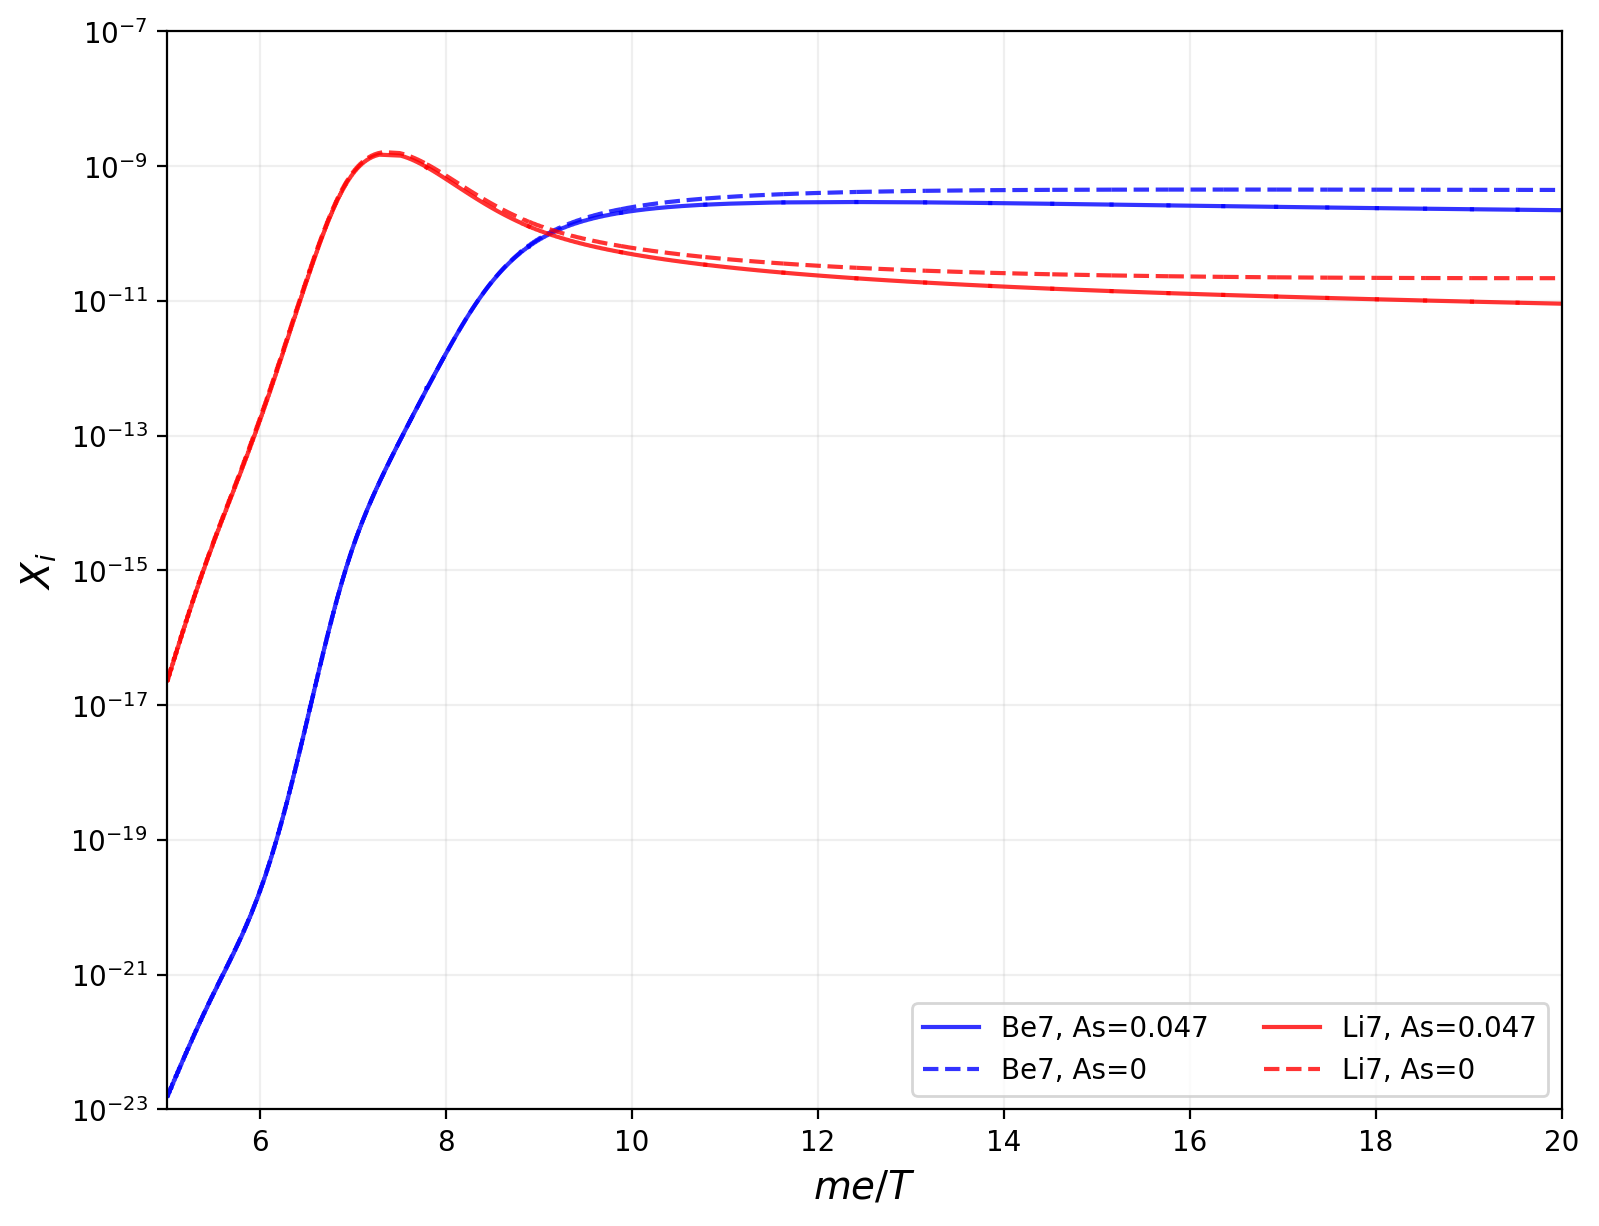

In [6]:
fig, ax = plt.subplots(figsize=(9,7))
df_spec['Be7'].plot(logy=True, ax=ax, lw=1.5, linestyle='-',alpha=0.8, color='b', label='Be7, As=0.047')
df_s['Be7'].plot(logy=True, ax=ax, lw=1.5, linestyle='--',alpha=0.8, color='b', label='Be7, As=0')
df_spec['Li7'].plot(logy=True, ax=ax, lw=1.5, linestyle='-',alpha=0.8, color='r', label='Li7, As=0.047')
df_s['Li7'].plot(logy=True, ax=ax, lw=1.5, linestyle='--',alpha=0.8, color='r', label='Li7, As=0')
ax.legend(ncol=2,loc=4)
ax.set_xlim(5,20)
ax.set_ylim(1e-23,1e-7)
ax.set_xlabel(r'$me/T$', fontsize=14)
ax.set_ylabel(r'$X_i$', fontsize=14)

## May 21

In [2]:
df_standard=pd.read_csv('/scratch/rag394/alterbbn/05_21_2018_standard.dat',names=names,sep='\s+',header=None)
df_standard.set_index('T9',inplace=True)
df_standard.index=df_standard.index.astype(float)
df_standard.index=1./df_standard.index*5.9281
df_standard.sort_index(inplace=True)

In [10]:
df_be=pd.read_csv('/scratch/rag394/alterbbn/output_fullevo_0531.dat',names=names,sep='\s+',header=None)
df_be.set_index('T9',inplace=True)
df_be.index=df_be.index.astype(float)
df_be.index=1./df_be.index*5.9281 
df_be.sort_index(inplace=True)

In [3]:
df_beli=pd.read_csv('/scratch/rag394/alterbbn/06_24_2018.dat',names=names,sep='\s+',header=None)
df_beli.set_index('T9',inplace=True)
df_beli.index=df_beli.index.astype(float)
df_beli.index=1./df_beli.index*5.9281
df_beli.sort_index(inplace=True)

In [8]:
df_belihe4=pd.read_csv('/scratch/rag394/alterbbn/05_21_2018_be7li7he4_breakup.dat',names=names,sep='\s+',header=None)
df_belihe4.set_index('T9',inplace=True)
df_belihe4.index=df_belihe4.index.astype(float)
df_belihe4.index=1./df_belihe4.index*5.9281 
df_belihe4.sort_index(inplace=True)

In [9]:
df_belihe4he3=pd.read_csv('/scratch/rag394/alterbbn/05_21_2018_be7li7he4he3_breakup.dat',names=names,sep='\s+',header=None)
df_belihe4he3.set_index('T9',inplace=True)
df_belihe4he3.index=df_belihe4he3.index.astype(float)
df_belihe4he3.index=1./df_belihe4he3.index*5.9281 
df_belihe4he3.sort_index(inplace=True)

In [10]:
df_belihe4he3T=pd.read_csv('/scratch/rag394/alterbbn/05_21_2018_be7li7he4he3T_breakup.dat',names=names,sep='\s+',header=None)
df_belihe4he3T.set_index('T9',inplace=True)
df_belihe4he3T.index=df_belihe4he3T.index.astype(float)
df_belihe4he3T.index=1./df_belihe4he3T.index*5.9281 
df_belihe4he3T.sort_index(inplace=True)

In [41]:
df_belihe4T=pd.read_csv('/scratch/rag394/alterbbn/05_21_2018_be7li7he4T_breakup.dat',names=names,sep='\s+',header=None)
df_belihe4T.set_index('T9',inplace=True)
df_belihe4T.index=df_belihe4T.index.astype(float)
df_belihe4T.index=1./df_belihe4T.index*5.9281 
df_belihe4T.sort_index(inplace=True)

In [47]:
df_belihe4he3TD=pd.read_csv('/scratch/rag394/alterbbn/05_21_2018_be7li7he4he3TD_breakup.dat',names=names,sep='\s+',header=None)
df_belihe4he3TD.set_index('T9',inplace=True)
df_belihe4he3TD.index=df_belihe4he3TD.index.astype(float)
df_belihe4he3TD.index=1./df_belihe4he3TD.index*5.9281 
df_belihe4he3TD.sort_index(inplace=True)

In [7]:
df_belihe3D=pd.read_csv('/scratch/rag394/alterbbn/06_06_2018.dat',names=names,sep='\s+',header=None)
df_belihe3D.set_index('T9',inplace=True)
df_belihe3D.index=df_belihe3D.index.astype(float)
df_belihe3D.index=1./df_belihe3D.index*5.9281 
df_belihe3D.sort_index(inplace=True)

<IPython.core.display.Javascript object>


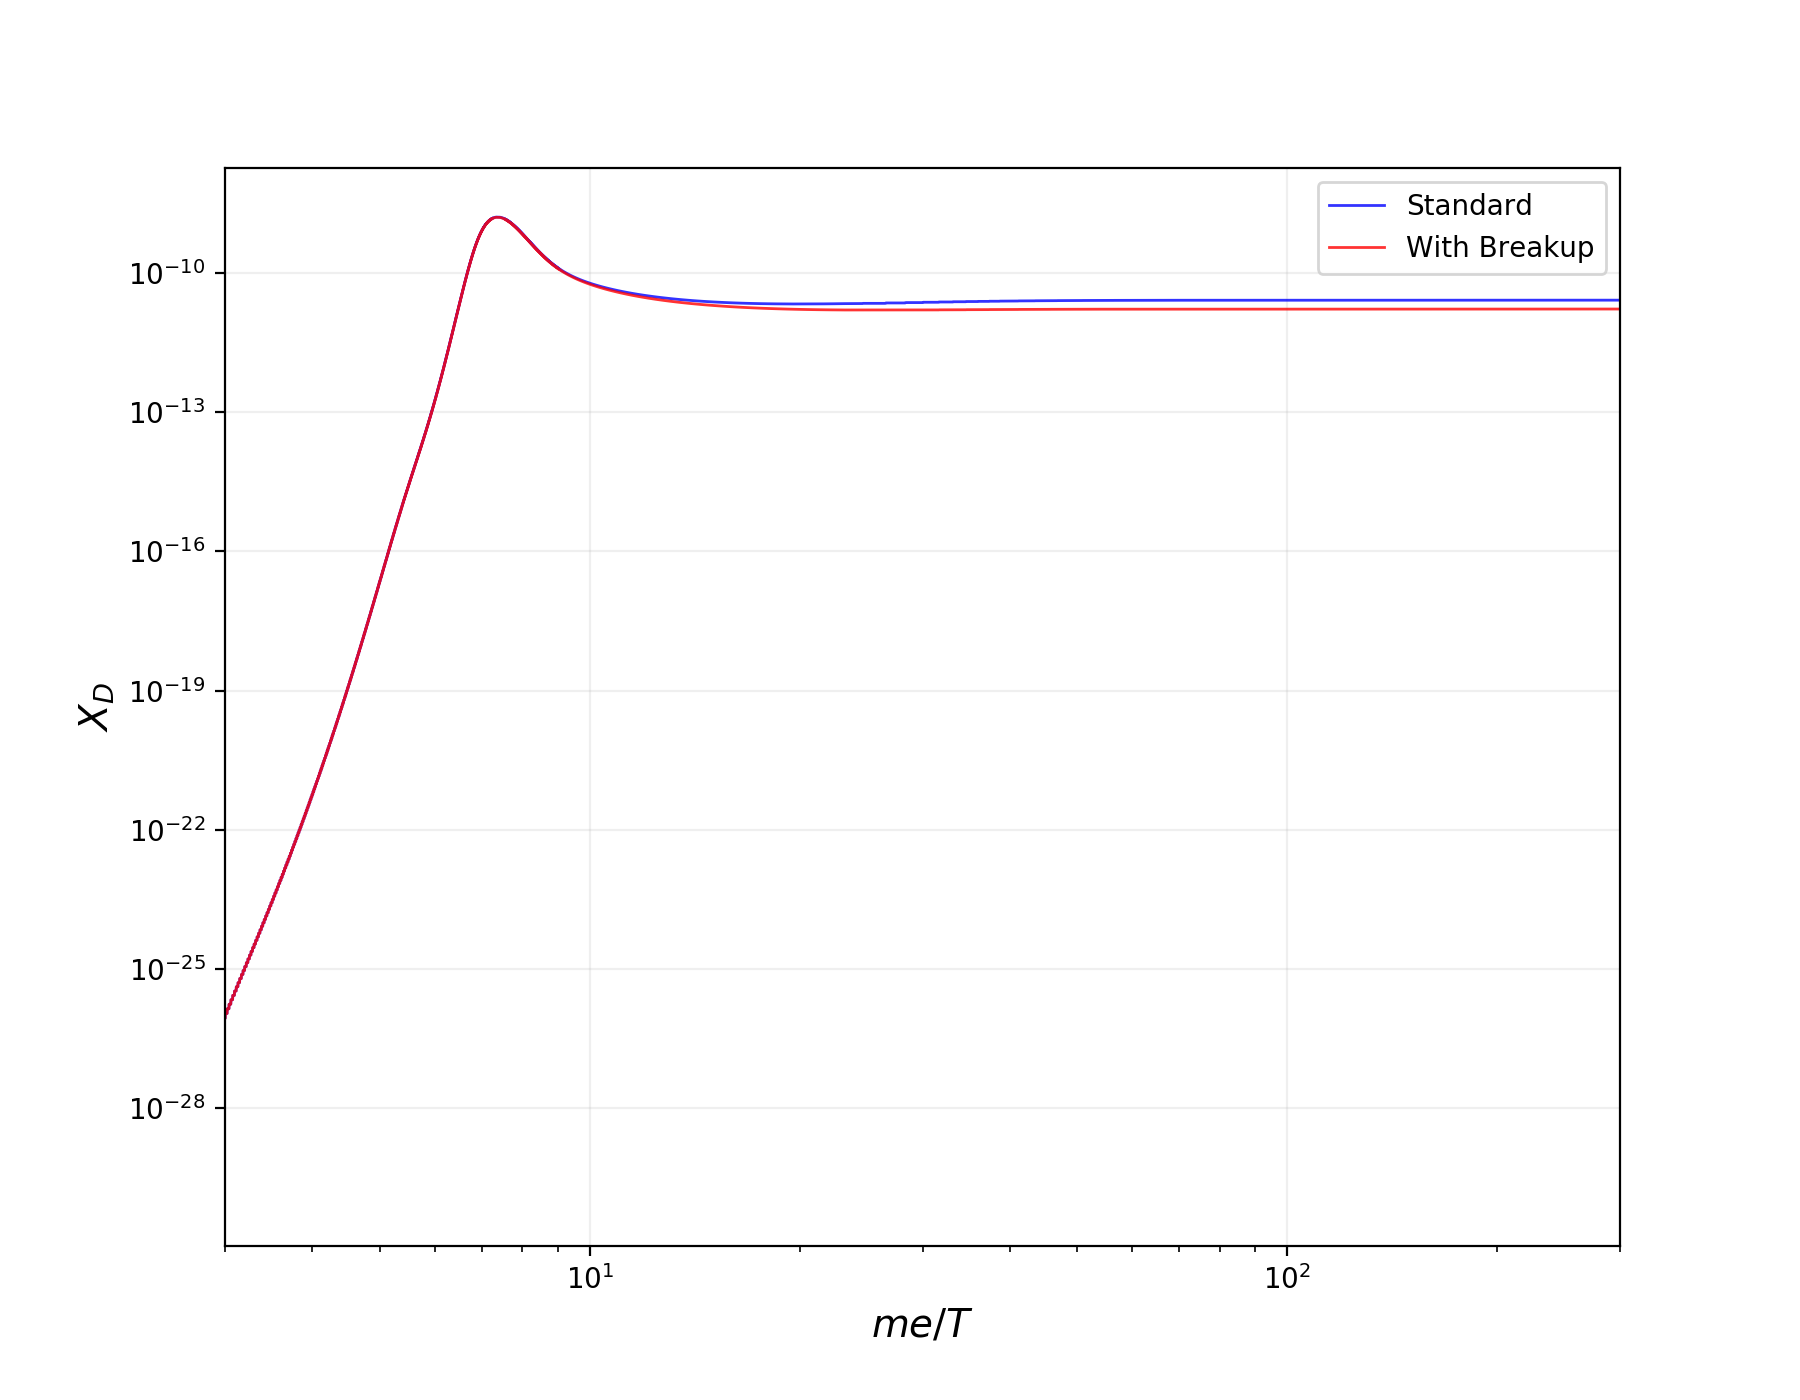

In [11]:
fig, ax = plt.subplots(figsize=(9,7))
df_standard['Li7'].plot(logy=True,logx=True,ax=ax,lw=1.0,linestyle='-',alpha=0.8,color='b',label='Standard')
# df_be['H2'].plot(logy=True,logx=True,ax=ax,lw=1.5,linestyle='--',alpha=0.8,color='r',label='be7 breakup')
df_beli['Li7'].plot(logy=True,logx=True,ax=ax,lw=1.0,linestyle='-',alpha=0.8,color='r',label='With Breakup')
# df_belihe4['H2'].plot(logy=True,logx=True,ax=ax,lw=1.5,linestyle='--',alpha=0.8,color='r',label='be7 li7 he4 breakup')
# df_belihe4he3['H2'].plot(logy=True,logx=True,ax=ax,lw=1.5,linestyle='--',alpha=0.8,color='r',label='be7 li7 he4 he3 breakup')
# df_belihe4he3T['H2'].plot(logy=True,logx=True,ax=ax,lw=1.5,linestyle='--',alpha=0.8,color='r',label='be7 li7 he4 he3 T breakup')
# df_belihe4T['H2'].plot(logy=True,logx=True,ax=ax,lw=1.5,linestyle='--',alpha=0.8,color='r',label='be7 li7 he4 T breakup')
# df_belihe4he3TD['H2'].plot(logy=True,logx=True,ax=ax,lw=1.5,linestyle='--',alpha=0.8,color='r',label='be7 li7 he4 he3 T D breakup')

ax.set_xlim(3,300);#ax.set_ylim(1.0e-6,1.0e-2)
ax.legend();ax.set_xlabel(r'$me/T$',fontsize=14);ax.set_ylabel(r'$X_{D}$',fontsize=14);

<IPython.core.display.Javascript object>


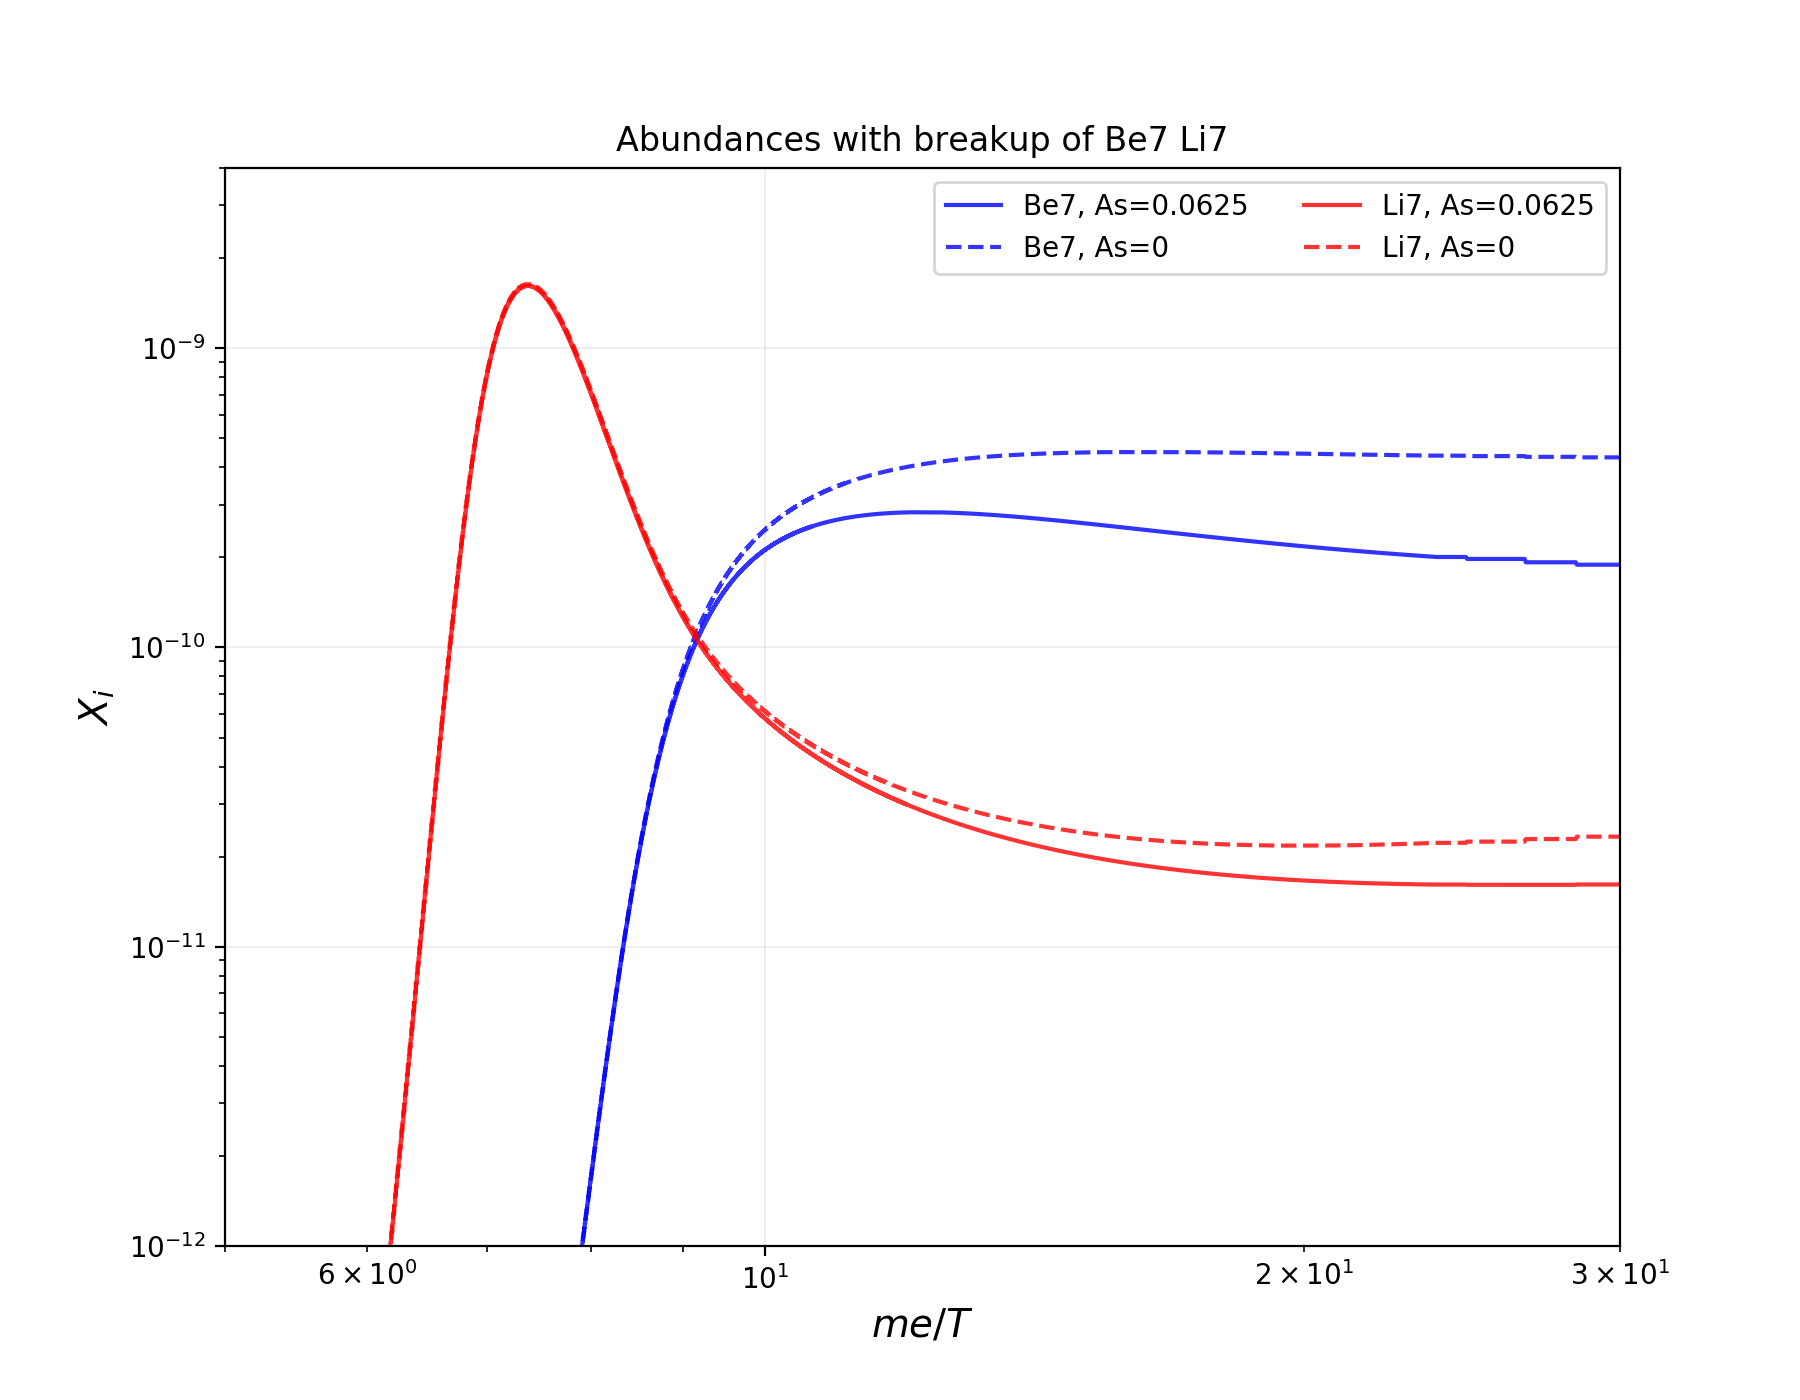

In [12]:
fig, ax = plt.subplots(figsize=(9,7))
df_beli['Be7'].plot(logy=True, ax=ax, lw=1.5, linestyle='-',alpha=0.8, color='b', label='Be7, with breakup')
df_standard['Be7'].plot(logy=True, ax=ax, lw=1.5, linestyle='--',alpha=0.8, color='b', label='Be7, standard')
df_beli['Li7'].plot(logy=True, logx=True,ax=ax, lw=1.5, linestyle='-',alpha=0.8, color='r', label='Li7, with breakup')
df_standard['Li7'].plot(logy=True, ax=ax, lw=1.5, linestyle='--',alpha=0.8, color='r', label='Li7, standard')
ax.legend(ncol=2,loc=1)
ax.set_xlim(5,30)
ax.set_ylim(1e-12,0.4e-8)
ax.set_xlabel(r'$me/T$', fontsize=14)
ax.set_ylabel(r'$X_i$', fontsize=14);
#ax.set_title('Abundances with breakup of Be7 Li7');

In [25]:
0.0625/266.778

0.0002342771892734783

<IPython.core.display.Javascript object>


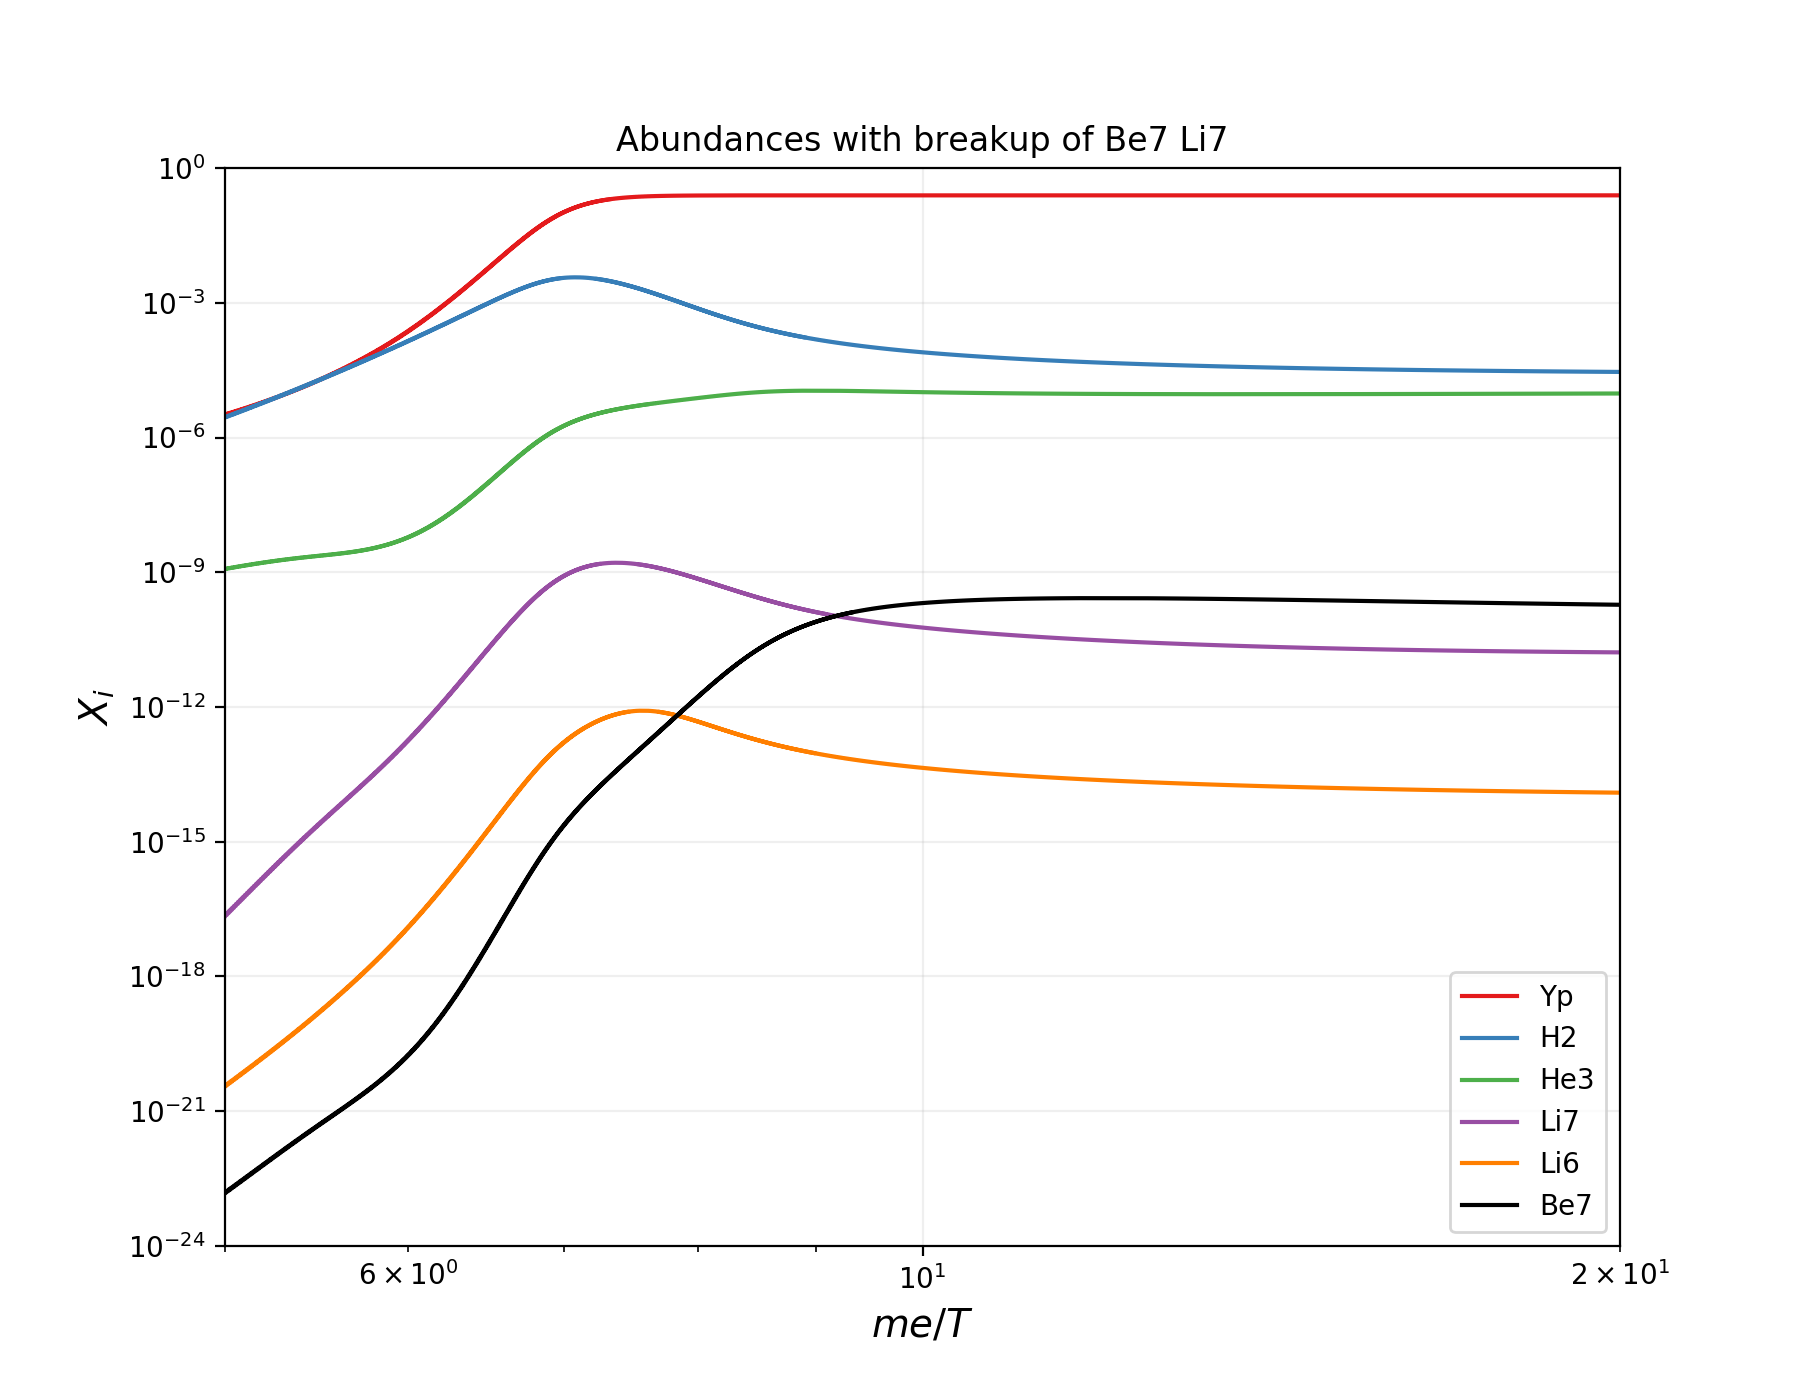

In [22]:
fig, ax = plt.subplots(figsize=(9,7))
df_beli[isotopes].plot(logy=True,logx=True,ax=ax,colors=colors)
ax.set_xlim(5,20)
ax.set_ylim(1e-24,1e-0)
ax.set_xlabel(r'$me/T$', fontsize=14)
ax.set_ylabel(r'$X_i$', fontsize=14)
ax.set_title('Abundances with breakup of Be7 Li7');

In [30]:
df_belihe3D[isotopes].iloc[-1]

Yp     2.462934e-01
H2     2.595779e-05
He3    1.013044e-05
Li7    1.650631e-11
Li6    1.127078e-14
Be7    1.422323e-10
Name: 592.8102955574291, dtype: float64

In [29]:
df_standard[isotopes].iloc[-1]

Yp     2.462931e-01
H2     2.580847e-05
He3    1.017730e-05
Li7    2.639954e-11
Li6    1.120582e-14
Be7    4.249590e-10
Name: 592.8102955574291, dtype: float64

In [46]:
print('Final He4 standard:               {}'.format(df_standard['Yp'].iloc[-1]))
print('Final He4 be breakup:             {}'.format(df_be['Yp'].iloc[-1]))
print('Final He4 be li breakup:          {}'.format(df_beli['Yp'].iloc[-1]))
print('Final He4 be li he4 breakup:      {}'.format(df_belihe4['Yp'].iloc[-1]))
print('Final He4 be li he4 T breakup:    {}'.format(df_belihe4T['Yp'].iloc[-1]))
print('Final He4 be li he4 he3 breakup:  {}'.format(df_belihe4he3['Yp'].iloc[-1]))

Final He4 standard:               0.2462931161
Final He4 be breakup:             0.24629293489
Final He4 be li breakup:          0.24629293489
Final He4 be li he4 breakup:      0.24629393408000003
Final He4 be li he4 T breakup:    0.2462929173
Final He4 be li he4 he3 breakup:  0.24630496415


In [44]:
print('Final Dx standard:               {}'.format(df_standard['H2'].iloc[-1]))
print('Final Dx be breakup:             {}'.format(df_be['H2'].iloc[-1]))
print('Final Dx be li breakup:          {}'.format(df_beli['H2'].iloc[-1]))
print('Final Dx be li he4 breakup:      {}'.format(df_belihe4['H2'].iloc[-1]))
print('Final Dx be li he4 T breakup:    {}'.format(df_belihe4T['H2'].iloc[-1]))
print('Final Dx be li he4 he3 breakup:  {}'.format(df_belihe4he3['H2'].iloc[-1]))
#print('Final Dx be li he4 he3 T breakup:  {}'.format(df_belihe4he3T['H2'].iloc[-1]))

Final Dx standard:               2.5808465873000006e-05
Final Dx be breakup:             2.5804166164e-05
Final Dx be li breakup:          2.5804166164e-05
Final Dx be li he4 breakup:      2.5774184538000004e-05
Final Dx be li he4 T breakup:    2.5817819862e-05
Final Dx be li he4 he3 breakup:  3.1829600311999996e-05


# Includes, etc 

In [2]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn-deep',{'axes.grid':True, 'grid.alpha':0.2}])
%matplotlib notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import warnings
warnings.filterwarnings("ignore")
names=['T9','Yp','H2','He3','Li7','Li6','Be7','f17','f19','f21', 'f27','f34','f89']
colors=['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','black']
isotopes=['Yp','H2','He3','Li7','Li6','Be7']

In [3]:
%matplotlib notebook